## Dataset Information

The purpose of this exercise is to detect the probability of default from the customers that want to apply to our lending product. As a baseline, we will be using the dataset that comes from LendingClub, which is a US peer-to-peer lending company. The company is recognized as the world's largest peer-to-peer lending platform. Given the historical data from the customer from this company, we will try to create the model that can help our company that offers a lending program to the customer, to predict whether the customer will payback the loan or not(A-Score implementation

## Dataset Feature

The dataset have 27 feature with the informations show below:

1. loan_amount = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. Term = The number of payments on the loan. Values are in months and can be either 36 or 60.
3. Int_rate = Interest Rate of the Loan.
4. Installment = The monthly payment owed by the borrower if the loan originates.
5. Grade = The monthly payment owed by the borrower if the loan originates.
6. SubGrade = LC assigned loan subgrade.
7. Emp_title = The job title supplied by the Borrower when applying for the loan.
8. Emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. Home_Ownership = The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.
10. Annual Income = The self-reported annual income provided by the borrower during registration.
11. Verification_Status = Indicates if income was verified by LC, not verified, or if the income source was verified.
12. Issue_D = The month which the loan was funded.
13. Loan_Status = Current status of the loan.
14. Purpose = A category provided by the borrower for the loan request.
15. Title = The loan title provided by the borrower.
16. Addr_State = The state provided by the borrower in the loan application.
17. DTI = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
18. Earliest_CR_Line = The month the borrower's earliest reported credit line was opened.
19. Open_Acc = The number of open credit lines in the borrower's credit file.
20. Pub_rec = Number of derogatory public records.
21. Revolving_Bal = Total credit revolving balance.
22. Revol_util = the amount of credit the borrower is using relative to all available revolving credit.
23. Total_acc = The total number of credit lines currently in the borrower's credit file.
24. Inital_Llist = The initial listing status of the loan. Possible values are – W, F.
25. Application_Type = Indicates whether the loan is an individual application or a joint application with two co-borrowers.
26. Mort_Acc = Nnumber of Mortgage Accounts.
27. Pub_Rec_Bankrupt Number of public record bankruptcies.

## Basic Import

In [ ]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Data Preparation

In [ ]:
df_main = pd.read_csv('/drive/My Drive/lending_club_loan_two.csv')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df_main.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


The dataset is quite cleaned, with 5 out of 27 features that consist the empty values

## EDA

In [ ]:
# Let's check the default probabilty
df_main.loan_status.value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

20% of our dataset is charged off, the dataset is quite imbalance, hence we need to pay attention to the inference later.

<Axes: >

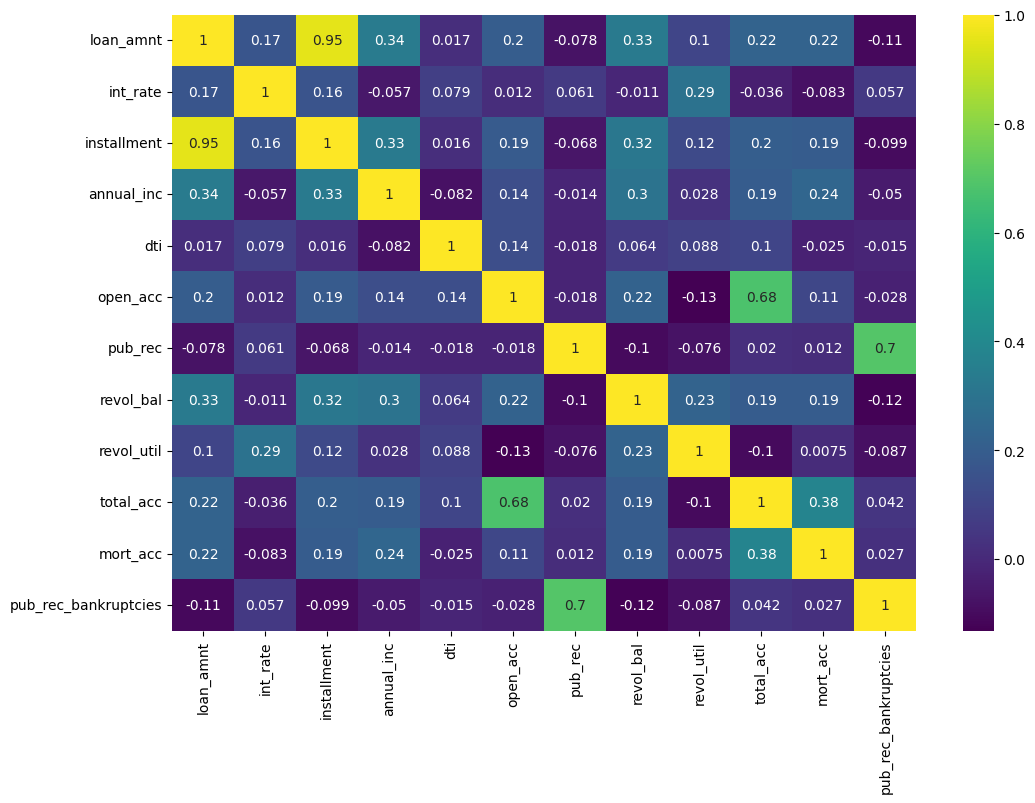

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_main.corr(), annot=True, cmap='viridis')

There is a high value of correlation between loan_amount with int_rate. We need to check whether this value is make sense or whether there is duplicate information in it

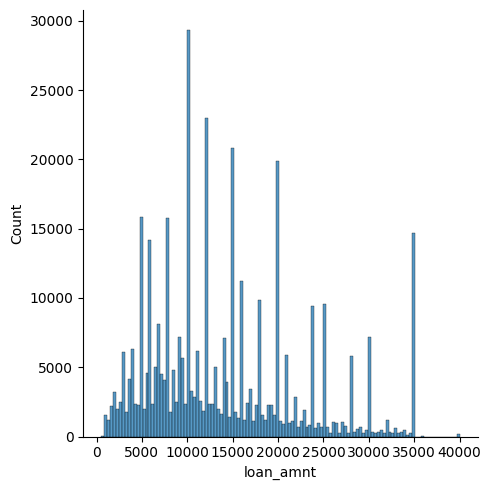

In [ ]:
# Let's try to plot the applied amount of loan
sns.displot(df_main['loan_amnt'])

Turns out our customers mainly applied for the amount of around 10k - 20k USD.

<Axes: xlabel='installment', ylabel='loan_amnt'>

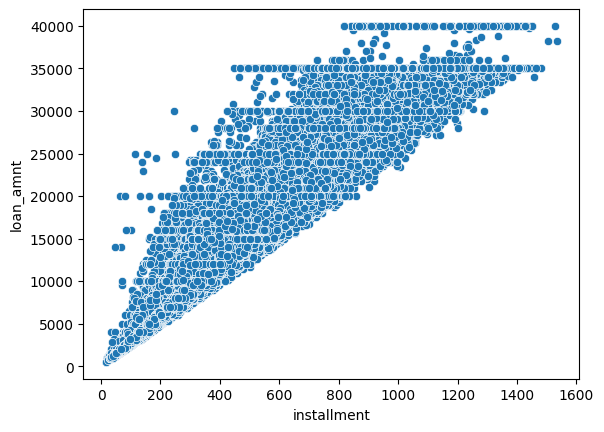

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df_main)

The installment amount has a linear correlation with the loan amount, which makes sense if we refer to the basic definition of it. The higher the Loan Amount, the higher the Installment amount that the customer must paid each month.

In [ ]:
# Term is object, which is not supposed to be, let's check it
df_main.term.value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

There are additional "Months" in the end, we will filtered it later.

<Axes: xlabel='grade', ylabel='count'>

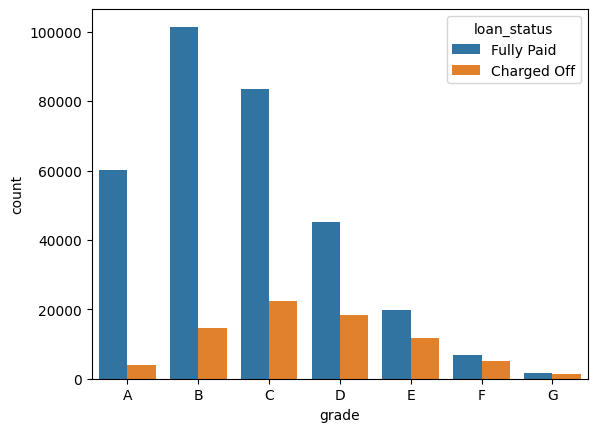

In [ ]:
#countplot the grade and the output
sns.countplot(x='grade', hue='loan_status', data=df_main, order=sorted(df_main['grade'].unique()))

<Axes: xlabel='sub_grade', ylabel='count'>

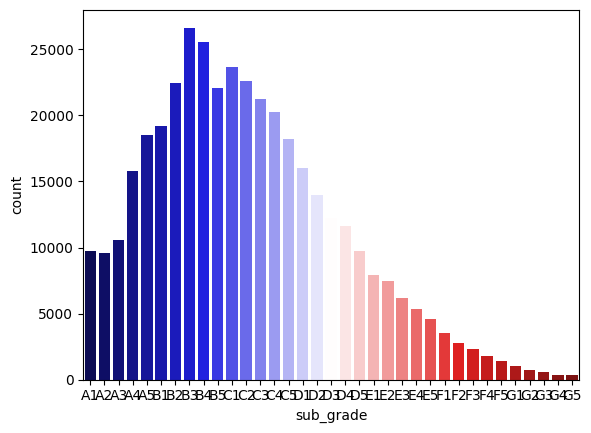

In [ ]:
sns.countplot(x='sub_grade', data=df_main, palette='seismic', order=sorted(df_main['sub_grade'].unique()))

There are 2 feature which grade and sub-grade that comes from LC. From this feature we can conclude that if the grade is higher, the amount of customer that charged off is more increased.

In [ ]:
## Let's check the purpose and title.
df_main[['purpose','title']].head()

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance


In [ ]:
df_main['title'] = df_main.title.str.lower()
df_main['title'].value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

Looks like we can safely dropped the title column since the value is very vary, and some of the applicant didn't provide this information. We can use purpose that was generated from it. 

## Data Pre-Processing

In [ ]:
# Let's check the missing value
for column in df_main.columns:
    if df_main[column].isna().sum() != 0:
        missing = df_main[column].isna().sum()
        portion = (missing / df_main.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


Let's check the employment feature

In [ ]:
df_main.emp_title.nunique()

173105

There are almost 175k unique values of employment title. Using OHE for this feature will make the dimensionality from our data increased tremendously. Hence we will drop this feature.

In [ ]:
for year in df_main.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df_main[df_main.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
Fully Paid     0.815814
Charged Off    0.184186
Name: loan_status, dtype: float64
4 years years in this position:
Fully Paid     0.807615
Charged Off    0.192385
Name: loan_status, dtype: float64
< 1 year years in this position:
Fully Paid     0.793128
Charged Off    0.206872
Name: loan_status, dtype: float64
6 years years in this position:
Fully Paid     0.810806
Charged Off    0.189194
Name: loan_status, dtype: float64
9 years years in this position:
Fully Paid     0.79953
Charged Off    0.20047
Name: loan_status, dtype: float64
2 years years in this position:
Fully Paid     0.806738
Charged Off    0.193262
Name: loan_status, dtype: float64
3 years years in this position:
Fully Paid     0.804769
Charged Off    0.195231
Name: loan_status, dtype: float64
8 years years in this position:
Fully Paid     0.80024
Charged Off    0.19976
Name: loan_status, dtype: float64
7 years years in this position:
Fully Paid     0.805226
Charged Off    0.194774
Name: loa

For employment years, the proportion of defaulted to non - defaulted is almost the same accross all category, meaning the information value behind this feature is on the low side. We will drop this feature also.

Let's check the mortgage value

In [ ]:
df_main.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

We need to fill the missing value. There are several methods to fill it. Based on the previous Heatmap, we can see the total_acc has a pretty high correlation value with the mort_acc. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
total_acc_avg = df_main.groupby(by='total_acc').mean().mort_acc
df_main['mort_acc'] = df_main.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

The other 2 features: revol_util & pub_rec_bankruptcies, have some missing values too, but the amount of the missing value is small (only 0.1% from the total data), so we can drop the entries with missing value for this two

In [ ]:
# drop the column first
df_main = df_main.drop(columns=['emp_title','emp_length','title'])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [ ]:
# drop the null value
df_main = df_main.dropna().reset_index(drop=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

Like we said previously, we will clean the term feature

In [ ]:
df_main['term'] = df_main['term'].map({' 36 months': 36, ' 60 months': 60})
df_main['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

We will drop grade and address feature

In [ ]:
df_main = df_main.drop(columns=['grade','address'])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

We will also dropped the date related feature: issue_d and earliest_cr_line

In [ ]:
df_main = df_main.drop(columns=['issue_d','earliest_cr_line'])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  open_acc              395219 non-null  float64
 12  pub_rec               395219 non-null  float64
 13  revol_bal             395219 non-null  float64
 14  revol_util            395219 non-null  float64
 15  

We will convert our target, the loan status to numerical value

In [ ]:
df_main['loan_status'] = df_main['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})
df_main['loan_status'].value_counts(normalize=True)

0    0.803848
1    0.196152
Name: loan_status, dtype: float64

The rest of the object value will be converted to numerical value using One Hot Encoding

In [ ]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
df_main = pd.get_dummies(df_main, columns=dummies, drop_first=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  int64  
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

All of the columns have been converted into numerical value. Next we will split our dataframe

## Data Splitting

We will used the most standard method for splitting: The holdout method. We will use 80% of our data to train a model, and 20% to be the testing data. For this step, we won't incorporate stratify sampling.

In [ ]:
X = df_main.drop(['loan_status'],axis=1)
Y = df_main['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

## Model Training

We will use one of SOTA model that commonly used in the classification problem for predicting Non Performing Loans, XGBoost. We will used the probabilty output as the objective and we will use the default parameter first to test the performance of the model without tuning.


In [ ]:
import xgboost as xgb
model_baseline = xgb.XGBClassifier(objective='binary:logistic')
model_baseline.fit(X_train, y_train)
y_train_pred = model_baseline.predict_proba(X_train)[:,1]
y_test_pred = model_baseline.predict_proba(X_test)[:,1]

Combining the prediction result to one dataframe

In [ ]:
train_proba_df = pd.DataFrame(data=y_train_pred, columns=["predict_proba"])
dfevaltrain = pd.DataFrame(data=y_train.index, columns=["index_old"]).set_index('index_old')
dfevaltrain['actual']=y_train
dfevaltrain.reset_index(drop=False, inplace=True)
train_proba_df.reset_index(drop=True, inplace=True)
dfevaltrain=pd.concat([dfevaltrain, train_proba_df], axis=1, ignore_index=True)
dfevaltrain['type'] = 'train'

pred_proba_df = pd.DataFrame(data=y_test_pred, columns=["predict_proba"])
dfevaltest = pd.DataFrame(data=y_test.index, columns=["index_old"]).set_index('index_old')
dfevaltest['actual']=y_test
dfevaltest.reset_index(drop=False, inplace=True)
pred_proba_df.reset_index(drop=True, inplace=True)
dfevaltest=pd.concat([dfevaltest, pred_proba_df], axis=1, ignore_index=True)
dfevaltest['type'] = 'test'

dfeval_xgb = pd.concat([dfevaltrain,dfevaltest])
dfeval_xgb.columns = ['index', 'actual', 'predict_proba', 'type']
dfeval_xgb=dfeval_xgb.set_index('index')
dfeval_xgb.head()

,actual,predict_proba,type
index,,,
117053,0,0.255326,train
150952,0,0.117990,train
241939,0,0.098532,train
272590,0,0.231100,train
213293,0,0.164789,train


## Model Evaluation

In [ ]:
dfeval_train_xgb = dfeval_xgb[dfeval_xgb['type'] == "train"]
dfeval_train_xgb = dfeval_train_xgb.reset_index(drop=True)
dfeval_train_xgb['actual'] = dfeval_train_xgb['actual'].astype(int)

In [ ]:
dfeval_test_xgb = dfeval_xgb[dfeval_xgb['type'] == "test"]
dfeval_test_xgb = dfeval_test_xgb.reset_index(drop=True)
dfeval_test_xgb['actual'] = dfeval_test_xgb['actual'].astype(int)

## 1. AUC Curve

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
def plot_auc(ax, ttl, y_train=[], y_train_pred=[], y_test=[], y_test_pred=[]):
    
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
        roc_auc_train = auc(fpr_train, tpr_train)   
        ax.plot(fpr_train, tpr_train)
    
    if ((len(y_test)>0)&(len(y_test_pred)>0)):      
        fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
        roc_auc_test = auc(fpr_test, tpr_test)       
        ax.plot(fpr_test, tpr_test)
        
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve {0}'.format(ttl))
    
    train_text = None
    test_text = None
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        train_text = 'TRAIN auc = {:.2f}'.format(roc_auc_train)
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
        test_text = 'TEST  auc = {:.2f}'.format(roc_auc_test)
    leg = []
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        leg.append(train_text)
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
        leg.append(test_text)
    ax.legend(leg)

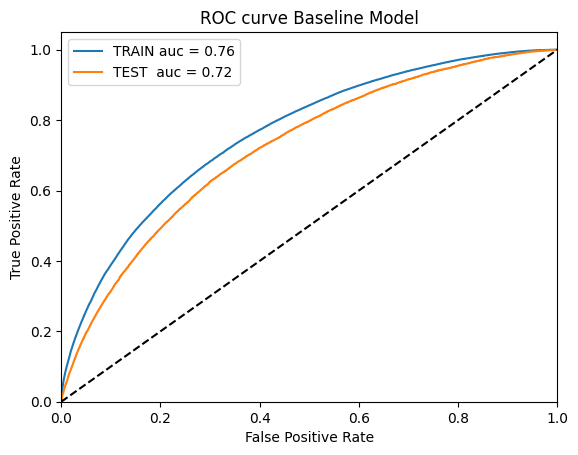

In [ ]:
fig,ax = plt.subplots(1)
plot_auc(ax, ttl = "Baseline Model",y_train=dfeval_train_xgb.actual, y_train_pred=dfeval_train_xgb.predict_proba,y_test=dfeval_test_xgb.actual, y_test_pred=dfeval_test_xgb.predict_proba)

The performance our baseline model is not too bad, since we got 0.76 AUC in train and 0.72 AUC in test. We can conclude that no overfitting happening in our baseline prediction too. If we push a bit further, we will get the Gini score of 0.52 for training data and 0.44 for testing data. 

(The equation to calculate Gini score is (2*AUC) - 1)

## 2. Confusion Matrix

In [ ]:
import itertools 

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

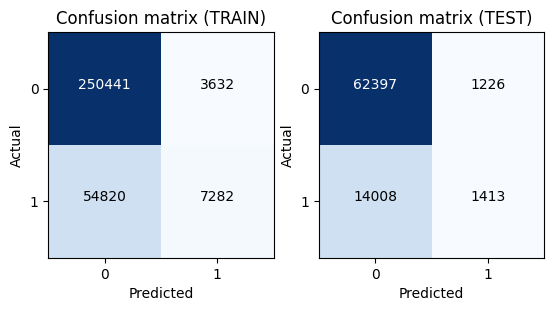

In [ ]:
fig,ax = plt.subplots(1,2)
plot_cm(ax[0],  dfeval_train_xgb.actual, dfeval_train_xgb.predict_proba, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1],  dfeval_test_xgb.actual, dfeval_test_xgb.predict_proba, [0,1], 'Confusion matrix (TEST)')

If we used the usual threshold of 0.5, our confusion matrix for the defaulted user or label 1, is not too good. As expected of the baseline model in an imbalance classification.

## 3. Classification Report

In [ ]:
dfeval_test_xgb['predict_class'] = dfeval_test_xgb['predict_proba'].apply(lambda x: 1 if x>0.5 else 0)
true_value=dfeval_test_xgb['actual']
predict_value = dfeval_test_xgb['predict_class']

In [ ]:
print(classification_report(true_value, predict_value))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     63623
           1       0.54      0.09      0.16     15421

    accuracy                           0.81     79044
   macro avg       0.68      0.54      0.52     79044
weighted avg       0.76      0.81      0.75     79044



Same with the confusion matrix, the baseline model is not too good in predicting the defaulted user. We can do some tuning for our model

## Model Tuning

In order to increase the performance of our model, we can do some hyperparameter tuning. We will used one of the two ways of basic tuning: Grid Search

In [ ]:
y_train.value_counts()

0    254073
1     62102
Name: loan_status, dtype: int64

In [ ]:
# Preparation for the scale pos weight to fixed the imbalanced
positive_samples = 62102 # The amount of data with label 1 in our data train
negative_samples = 254073 # The amount of data with label 0 in our data train
x = negative_samples/positive_samples
y = np.sqrt(negative_samples/positive_samples)

In [ ]:
# Grid Search tuning
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
parameters = {'eta': [0.01,0.05,0.1],'scale_pos_weight' :[x,y]}
scorers = {'AUC':'roc_auc'}
clf = GridSearchCV(xgb_model, param_grid = parameters, scoring = scorers, cv = 3,refit = 'AUC', n_jobs=-1)
clf.fit(X_train, y_train)
best_pars = clf.best_params_

In [ ]:
print(best_pars)

{'eta': 0.1, 'scale_pos_weight': 4.091220894657177}


## Model Training #2

We will use the parameter we obtained from tuning model to test the performance of our model

In [ ]:
import xgboost as xgb
model_tuned = xgb.XGBClassifier(objective='binary:logistic', eta=0.1, scale_pos_weight=4.091220894657177)
model_tuned.fit(X_train, y_train)
y_train_pred = model_tuned.predict_proba(X_train)[:,1]
y_test_pred = model_tuned.predict_proba(X_test)[:,1]

Combining the prediction result to one dataframe

In [ ]:
train_proba_df = pd.DataFrame(data=y_train_pred, columns=["predict_proba"])
dfevaltrain = pd.DataFrame(data=y_train.index, columns=["index_old"]).set_index('index_old')
dfevaltrain['actual']=y_train
dfevaltrain.reset_index(drop=False, inplace=True)
train_proba_df.reset_index(drop=True, inplace=True)
dfevaltrain=pd.concat([dfevaltrain, train_proba_df], axis=1, ignore_index=True)
dfevaltrain['type'] = 'train'

pred_proba_df = pd.DataFrame(data=y_test_pred, columns=["predict_proba"])
dfevaltest = pd.DataFrame(data=y_test.index, columns=["index_old"]).set_index('index_old')
dfevaltest['actual']=y_test
dfevaltest.reset_index(drop=False, inplace=True)
pred_proba_df.reset_index(drop=True, inplace=True)
dfevaltest=pd.concat([dfevaltest, pred_proba_df], axis=1, ignore_index=True)
dfevaltest['type'] = 'test'

dfeval_xgb = pd.concat([dfevaltrain,dfevaltest])
dfeval_xgb.columns = ['index', 'actual', 'predict_proba', 'type']
dfeval_xgb=dfeval_xgb.set_index('index')
dfeval_xgb.head()

,actual,predict_proba,type
index,,,
117053,0,0.644749,train
150952,0,0.418846,train
241939,0,0.410334,train
272590,0,0.537637,train
213293,0,0.398067,train


## Model Evaluation

In [ ]:
dfeval_train_xgb = dfeval_xgb[dfeval_xgb['type'] == "train"]
dfeval_train_xgb = dfeval_train_xgb.reset_index(drop=True)
dfeval_train_xgb['actual'] = dfeval_train_xgb['actual'].astype(int)

In [ ]:
dfeval_test_xgb = dfeval_xgb[dfeval_xgb['type'] == "test"]
dfeval_test_xgb = dfeval_test_xgb.reset_index(drop=True)
dfeval_test_xgb['actual'] = dfeval_test_xgb['actual'].astype(int)

## 1. AUC Curve

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
def plot_auc(ax, ttl, y_train=[], y_train_pred=[], y_test=[], y_test_pred=[]):
    
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
        roc_auc_train = auc(fpr_train, tpr_train)   
        ax.plot(fpr_train, tpr_train)
    
    if ((len(y_test)>0)&(len(y_test_pred)>0)):      
        fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
        roc_auc_test = auc(fpr_test, tpr_test)       
        ax.plot(fpr_test, tpr_test)
        
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve {0}'.format(ttl))
    
    train_text = None
    test_text = None
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        train_text = 'TRAIN auc = {:.2f}'.format(roc_auc_train)
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
        test_text = 'TEST  auc = {:.2f}'.format(roc_auc_test)
    leg = []
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        leg.append(train_text)
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
        leg.append(test_text)
    ax.legend(leg)

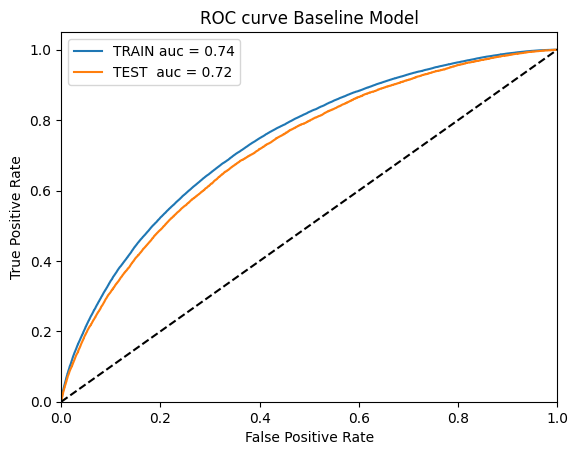

In [ ]:
fig,ax = plt.subplots(1)
plot_auc(ax, ttl = "Baseline Model",y_train=dfeval_train_xgb.actual, y_train_pred=dfeval_train_xgb.predict_proba,y_test=dfeval_test_xgb.actual, y_test_pred=dfeval_test_xgb.predict_proba)

The performance our tuned model is slightly lower than the baseline model, but it still gives a good result with AUC around 0.70 - 0.75. The Gini score for train is about 0.48 and the Gini score for test is about 0.44. The model doesn't have overfitting happening, and normally model with gini above 0.4 is considered a good model (considering we only tuned 2 parameters from the model).

## 2. Confusion Matrix

In [ ]:
import itertools 

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

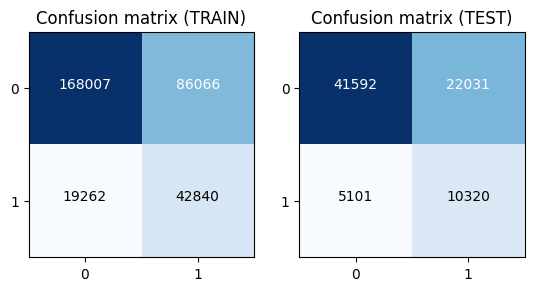

In [ ]:
fig,ax = plt.subplots(1,2)
plot_cm(ax[0],  dfeval_train_xgb.actual, dfeval_train_xgb.predict_proba, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1],  dfeval_test_xgb.actual, dfeval_test_xgb.predict_proba, [0,1], 'Confusion matrix (TEST)')

The confusion matrix shows a huge improvement compared with the baseline model. Around 70% of the defaulted user (the user with label 1) is now classified as "defaulted".

## 3. Classification Report

In [ ]:
dfeval_test_xgb['predict_class'] = dfeval_test_xgb['predict_proba'].apply(lambda x: 1 if x>0.5 else 0)
true_value=dfeval_test_xgb['actual']
predict_value = dfeval_test_xgb['predict_class']

In [ ]:
print(classification_report(true_value, predict_value))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     63623
           1       0.32      0.67      0.43     15421

    accuracy                           0.66     79044
   macro avg       0.60      0.66      0.59     79044
weighted avg       0.78      0.66      0.69     79044



Although the accuracy is down, the performance across both class is more stable after we tuned our model. This will be a good benchmark for further tuning.

## Conclusion

The process above shows the basic end-to-end model training that usually happened in a daily basis for a Data Scientist. Please do remember that there are a lot more consideration that we can do to improves our model, such as:

1. Feature selection: We can reduce the number of features that we used in our modelling, to improve the performance. This step is important, especially if we used tree-based model.

2. Parameter tuning: Due to time and resources constraint, we only tuned 2 parameters. There are a lot more tuning that we can do, such as using more parameters, using another method such as Bayesian Hyperparameter Tuning, etc.

3. Inference: We can add more metrics to our inferenc, such as KS Graph (considering that we're observing default loans behavior).

4. Probability cutoff: We used 0.5 as a default threshold for the probability cutoff. Often times, we have to find the optimal cutoff, since 0.5 is not always applicable to be used in the industry setting.

5. Risk Table: This is more of domain expertise, but if we're working on fintech industry, a risk table to determine the cutoff score that we can use to accept the applicant is much more preferable compared with raw probability

NB: There is no scaling process because Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.